In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
# paths 
trainpath = '../input/cat-and-dog/training_set/training_set/'
testpath = '../input/cat-and-dog/test_set/test_set/'

In [3]:
print(os.listdir(trainpath))
print(os.listdir(testpath))

['dogs', 'cats']
['dogs', 'cats']


In [4]:
# This code to count the number of images in Trian folder
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    imgs=gb.glob(pathname=str(trainpath+folder+'/*.jpg'))
    print('Number of images is ',len(imgs),'images')

folder name is :  dogs
Number of images is  4005 images
folder name is :  cats
Number of images is  4000 images


In [5]:
for folder in  os.listdir(testpath) : 
    print( 'folder name is : ', folder)
    imgs=gb.glob(pathname=str(testpath+folder+'/*.jpg'))
    print('Number of images is ',len(imgs),'images')

folder name is :  dogs
Number of images is  1012 images
folder name is :  cats
Number of images is  1011 images


In [6]:
# fixed size of all data
fixed_size=224

In [7]:
# this function to get the name of class 
image_class={'cats':0,'dogs':1}

def get_class(n):
    for k,v in image_class.items():
        if n==v:
            return k

In [8]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'Folder name is : ', folder)
    images = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print('Start reading images')
    for image in images: 
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image , (fixed_size,fixed_size))
        X_train.append(image)
        y_train.append(image_class[folder])
    print('Reading',len(images),'Iamges \n Finished...')
print('--------------------------------------------------')        
#check items in X_train
print("Images in X_train is: ",len(X_train) , " images") 
print("Images in y_train is: ",len(y_train) , " images") 

Folder name is :  dogs
Start reading images
Reading 4005 Iamges 
 Finished...
Folder name is :  cats
Start reading images
Reading 4000 Iamges 
 Finished...
--------------------------------------------------
Images in X_train is:  8005  images
Images in y_train is:  8005  images


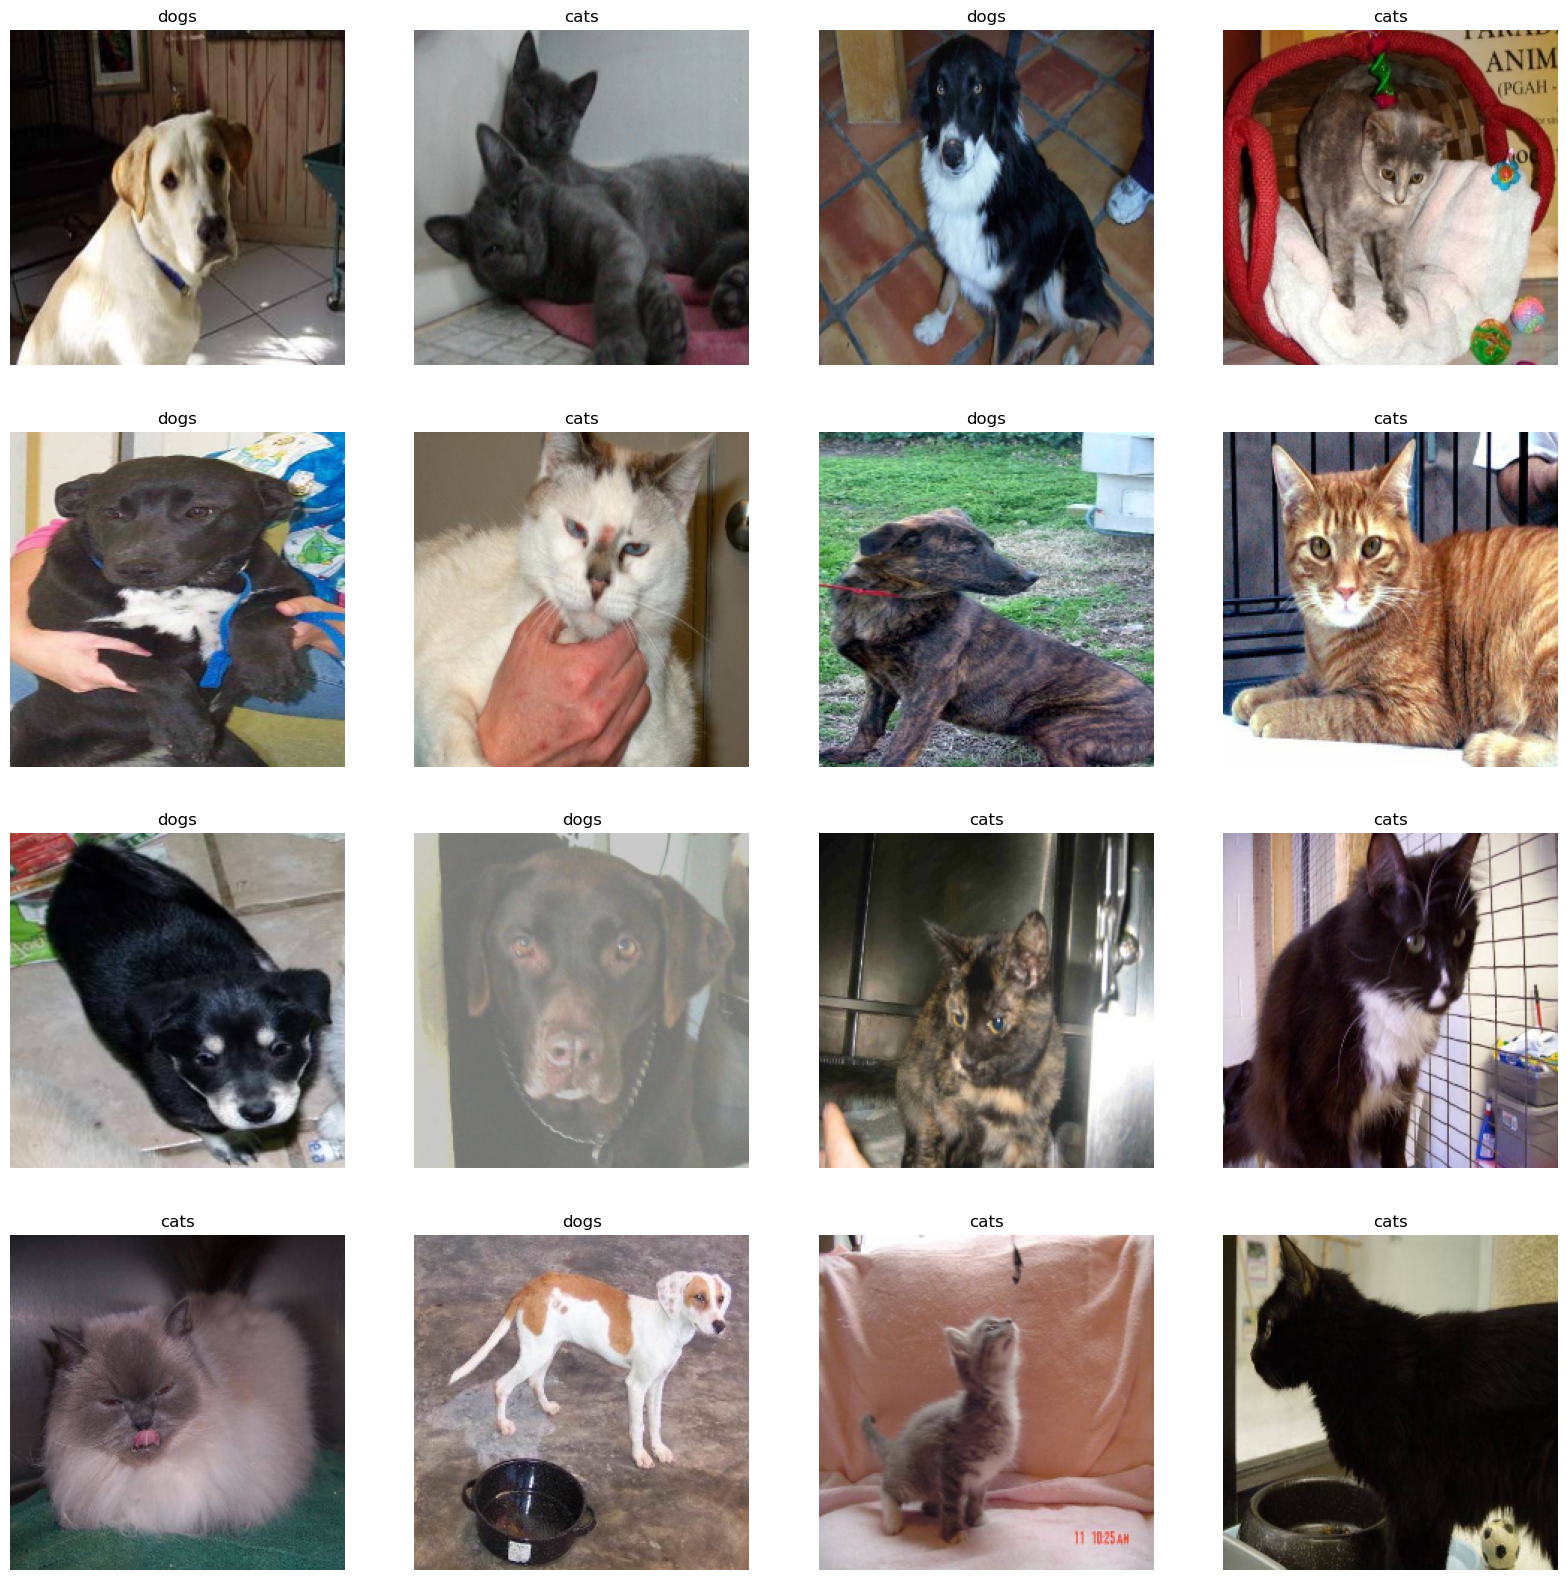

In [9]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    plt.title(get_class(y_train[i]))

In [10]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    print( 'Folder name is : ', folder)
    images = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    print('Start reading images')
    for image in images: 
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image , (fixed_size,fixed_size))
        X_test.append(image)
        y_test.append(image_class[folder])
    print('Reading',len(images),'Iamges \n Finished...')
print('--------------------------------------------------')        
#check items in X_test
print("Images in X_test is: ",len(X_test) , " images") 
print("Images in y_test is: ",len(y_test) , " images") 

Folder name is :  dogs
Start reading images
Reading 1012 Iamges 
 Finished...
Folder name is :  cats
Start reading images
Reading 1011 Iamges 
 Finished...
--------------------------------------------------
Images in X_test is:  2023  images
Images in y_test is:  2023  images


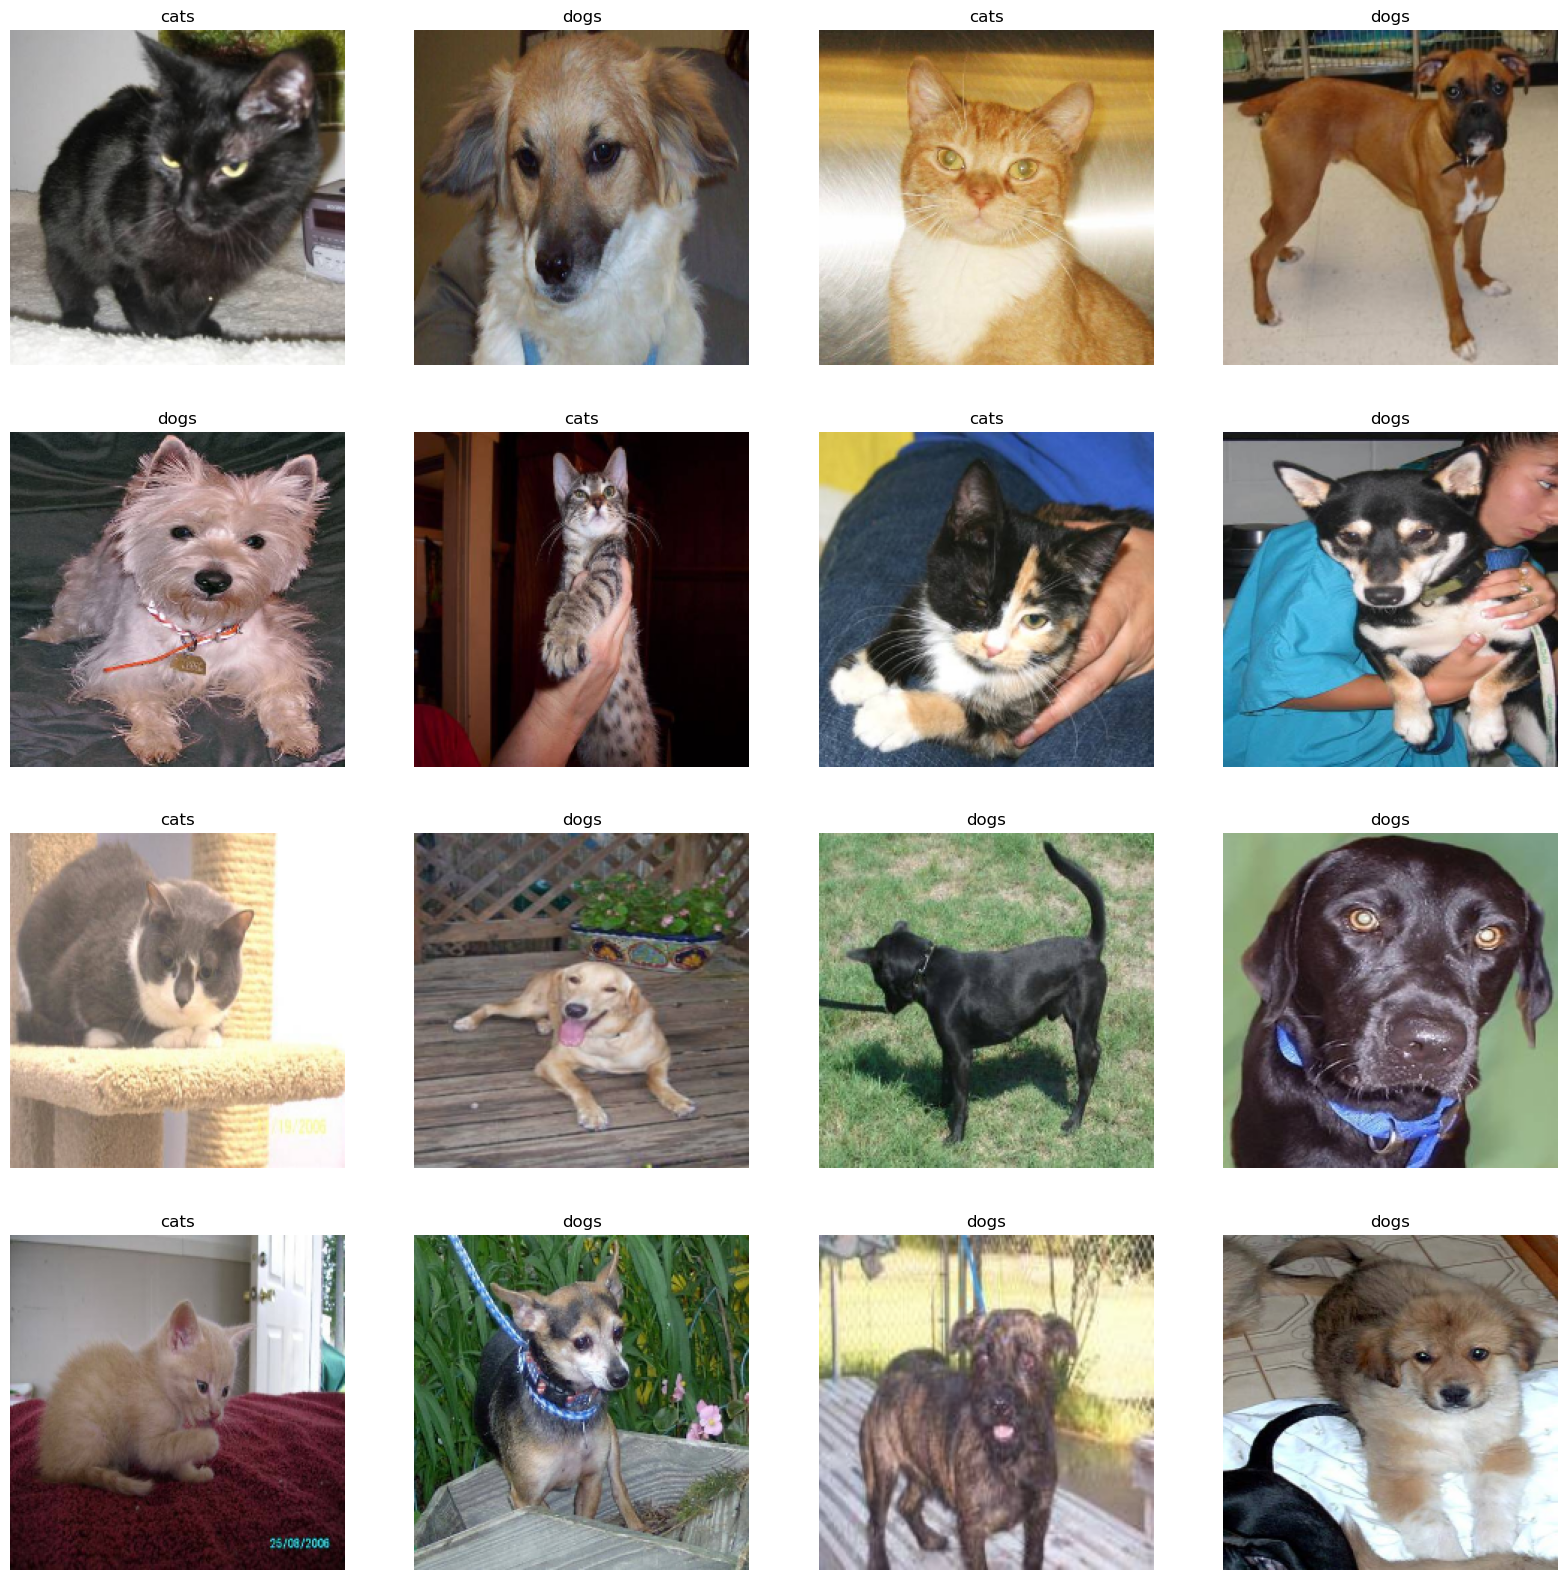

In [11]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    
    plt.title(get_class(y_test[i]))

In [13]:
#converting training and testiong data to array

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape  : (8005, 224, 224, 3)
y_train shape : (8005,)
X_test shape  : (2023, 224, 224, 3)
y_test shape : (2023,)


In [15]:
"""#shuffle data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_test,y_test = shuffle(X_test,y_test)"""

'#shuffle data\nfrom sklearn.utils import shuffle\nX_train,y_train = shuffle(X_train,y_train)\nX_test,y_test = shuffle(X_test,y_test)'

In [16]:
"""# normalizing data
X_train = X_train/255.0
X_test = X_test/255.0"""

'# normalizing data\nX_train = X_train/255.0\nX_test = X_test/255.0'

Building a model

In [19]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [20]:
model=Sequential([
        Conv2D(8,3,padding='same',input_shape = (224, 224, 3), activation = "relu"),
    MaxPooling2D(2),
    Conv2D(16,3,padding='same', activation = "relu"),
    MaxPooling2D(2),
    Conv2D(32,3,padding='same', activation = "relu"),
    MaxPooling2D(2),
    Conv2D(64,3,padding='same', activation = "relu"),
    MaxPooling2D(2),
    Conv2D(128,3,padding='same', activation = "relu"),
    MaxPooling2D(2),
    Conv2D(256,3,padding='same', activation = "relu"),
    MaxPooling2D(2),
    Flatten(),
    Dense(256,activation = "relu"),
    Dropout(0.2),
    Dense(128,activation = "relu"),
    Dropout(0.2),
    Dense(64,activation = "relu"),
    Dropout(0.2),
    Dense(2,activation = "softmax")

])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [26]:
epochs=20
history = model.fit(X_train,y_train,batch_size=64,epochs=epochs)

Epoch 1/20
126/126 [==============================] - 179s 1s/step - loss: 0.7902 - accuracy: 0.5425
Epoch 2/20
126/126 [==============================] - 176s 1s/step - loss: 0.6225 - accuracy: 0.6575
Epoch 3/20
126/126 [==============================] - 175s 1s/step - loss: 0.5698 - accuracy: 0.7104
Epoch 4/20
126/126 [==============================] - 175s 1s/step - loss: 0.5178 - accuracy: 0.7487
Epoch 5/20
126/126 [==============================] - 174s 1s/step - loss: 0.4746 - accuracy: 0.7754
Epoch 6/20
126/126 [==============================] - 174s 1s/step - loss: 0.4299 - accuracy: 0.8055
Epoch 7/20
126/126 [==============================] - 174s 1s/step - loss: 0.3827 - accuracy: 0.8314
Epoch 8/20
126/126 [==============================] - 174s 1s/step - loss: 0.3496 - accuracy: 0.8486
Epoch 9/20
126/126 [==============================] - 175s 1s/step - loss: 0.3226 - accuracy: 0.8636
Epoch 10/20
126/126 [==============================] - 174s 1s/step - loss: 0.2623 - accura

In [28]:
model.evaluate(X_train,y_train)

251/251 [==============================] - 53s 213ms/step - loss: 0.0512 - accuracy: 0.9825


[0.05120198801159859, 0.9825109243392944]

In [29]:
model.evaluate(X_test,y_test)

64/64 [==============================] - 14s 215ms/step - loss: 0.7500 - accuracy: 0.8003


[0.7499808669090271, 0.8002966046333313]

In [30]:
y_pred=model.predict(X_test)

64/64 [==============================] - 13s 207ms/step


In [31]:
y_pred[2]

array([0.01849505, 0.98150504], dtype=float32)

In [32]:
y_pred=np.argmax(y_pred,axis=1)

In [33]:
y_pred[2]

1

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[785, 226],
       [178, 834]])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1011
           1       0.79      0.82      0.81      1012

    accuracy                           0.80      2023
   macro avg       0.80      0.80      0.80      2023
weighted avg       0.80      0.80      0.80      2023



**Accuracy => 82%**